In [1]:
# Define the dataframe df
df <- data.frame(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)
library(purrr)

## THE ... ARGUMENT TO THE MAP FUNCTION

The map functions use the ... ("dot dot dot") argument to pass along additional arguments to .f each time it's called.

In [2]:
# Find the mean of each column
map_dbl(df, mean)

# Find the mean of each column, excluding missing values
map_dbl(df, mean, na.rm = TRUE)

# Find the 5th percentile of each column, excluding missing values
map_dbl(df, quantile, probs = 0.05, na.rm = TRUE)

a          b          c          d 
 0.0958103  0.0270916 -0.1732747 -0.3408129

a          b          c          d 
 0.0958103  0.0270916 -0.1732747 -0.3408129

a         b         c         d 
-2.178223 -1.013244 -2.208482 -1.667392

## PICK THE RIGHT MAP FUNCTION

You can always use map(), which will return a list, but using the right function expect the error

In [3]:
# Find the columns that are numeric
map_lgl(df, is.numeric)

# Find the type of each column
map_chr(df, typeof)

# Find a summary of each column
map(df, summary)

a    b    c    d 
TRUE TRUE TRUE TRUE

a        b        c        d 
"double" "double" "double" "double"

$a
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.34115 -0.33278  0.34448  0.09581  1.13647  1.65703 

$b
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.07524 -0.81787 -0.40193  0.02709  0.88698  1.82020 

$c
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.2274 -0.7520  0.2887 -0.1733  0.3624  1.4912 

$d
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.1574 -0.8219 -0.5972 -0.3408  0.2875  1.4257 


## SHORTCUTS USING A FORMULA

In [4]:
# Split dataframe mtcars based on cyl
cyl <- split(mtcars, mtcars$cyl)

# Rewrite to use the formula shortcut instead
map(cyl, ~ lm(mpg ~ wt, data = .))

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



## SHORTCUT USING A STRING

In [5]:
# Save the result from the previous exercise to the variable models
models <- map(cyl, ~ lm(mpg ~ wt, data = .))

# Use map and coef to get the coefficients for each model: coefs
coefs <- map(models, coef)

# Use string shortcut to extract the wt coefficient 
map(coefs, "wt")

# Another way is to use numeric vector
map_dbl(coefs, 2)

$`4`
[1] -5.647025

$`6`
[1] -2.780106

$`8`
[1] -2.192438

4         6         8 
-5.647025 -2.780106 -2.192438

## MAP OVER 2 ARGUMENTS

In [6]:
# Initialize n
n <- list(5, 10, 20)

# Create a list mu containing the values: 1, 5, and 10
mu <- list(1, 5, 10)

# Edit to call map2() on n and mu with rnorm() to simulate three samples
map2(n, mu, rnorm)

[[1]]
[1]  1.2370171 -1.2314706  0.3430213  0.1531199  0.6175714

[[2]]
 [1] 3.754013 5.540210 5.092877 7.145262 6.378569 4.222984 4.624560 4.439887
 [9] 5.920278 5.676844

[[3]]
 [1]  8.619998 10.319553 10.372670  9.699190 11.258251 10.293219 11.147832
 [8]  8.306795  9.892725  9.657934  9.786412  9.582587  9.495143  8.793656
[15] 11.288031  9.418119  9.950372  8.759423  9.467493 11.559556

## MAP OVER MORE THAN 2 ARGUMENTS

In [7]:
# Initialize n and mu
n <- list(5, 10, 20)
mu <- list(1, 5, 10)

# Create a sd list with the values: 0.1, 1 and 0.1
sd <- list(0.1, 1, 0.1)

# Edit this call to pmap() to iterate over the sd list as well
pmap(list(n, mu, sd), rnorm)

# Name the elements of the argument list
pmap(list(mean = mu, n = n, sd = sd), rnorm) # => safer because match by argument, not position

[[1]]
[1] 1.1204490 0.8347964 0.8647896 1.0455224 0.9740665

[[2]]
 [1] 4.905542 4.285225 5.644979 2.878838 3.603934 4.905591 5.421308 4.580040
 [9] 5.071773 5.302856

[[3]]
 [1]  9.954643  9.998387 10.022981 10.060795 10.062452  9.938916 10.058667
 [8]  9.967920  9.840388 10.122873  9.899758 10.068046  9.988820  9.900479
[15]  9.987711 10.043743 10.054277 10.076785 10.080400 10.061532

[[1]]
[1] 1.0302048 1.0520825 0.9159773 0.8706002 1.0704882

[[2]]
 [1] 5.321283 3.911045 4.577341 5.895576 5.994587 5.871086 6.647751 6.741038
 [9] 4.890219 3.372197

[[3]]
 [1] 10.021031  9.822479 10.114439 10.105010  9.841067  9.983562 10.090503
 [8]  9.860450 10.069052  9.877377 10.020137  9.860281  9.937003 10.065107
[15]  9.978691  9.937623  9.978184  9.890633 10.015343 10.021036

## MAP OVER FUNCTIONS AND ARGUMENTS

In [8]:
# Define list of functions
f <- list("rnorm", "runif", "rexp")

# Parameter list for rnorm()
rnorm_params <- list(mean = 10)

# Add a min element with value 0 and max element with value 5
runif_params <- list(min = 0, max = 5)

# Add a rate element with value 5
rexp_params <- list(rate = 5)

# Define params for each function
params <- list(
  rnorm_params,
  runif_params,
  rexp_params
)

# Call invoke_map() on f supplying params as the second argument
invoke_map(f, params, n = 5)

[[1]]
[1]  9.937296 11.112567  9.526388 11.303952  8.802393

[[2]]
[1] 1.2612152 3.3666741 0.3122941 4.6784747 1.5658919

[[3]]
[1] 0.13116931 0.12961604 0.14027625 0.26021626 0.06378976

## MAP WITH SIDE EFFECTS: WALK

Side effects = printing, plotting or saving.

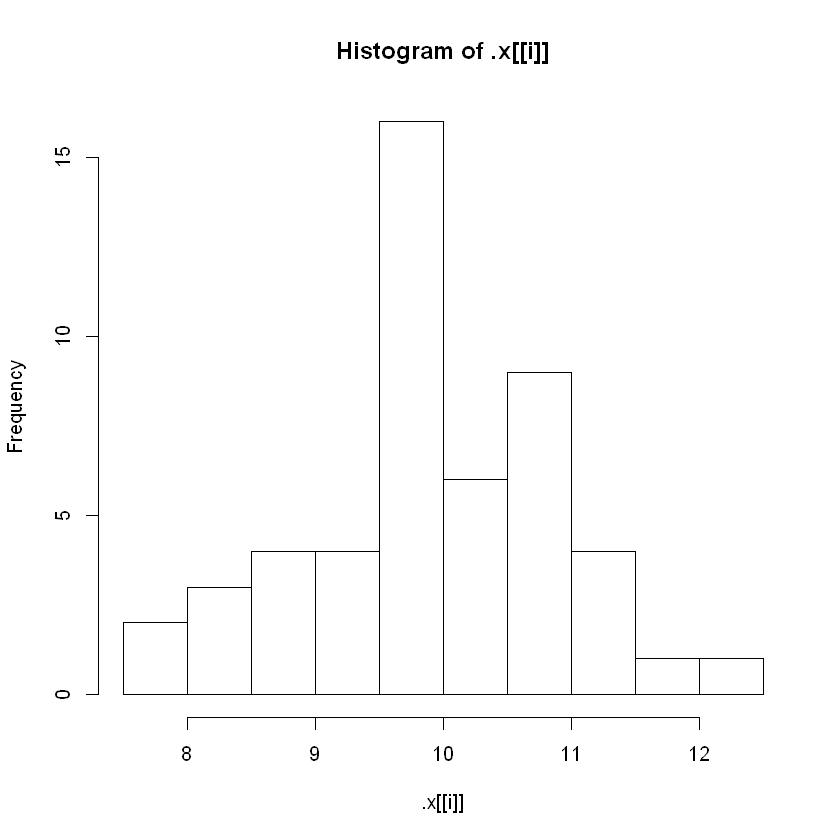

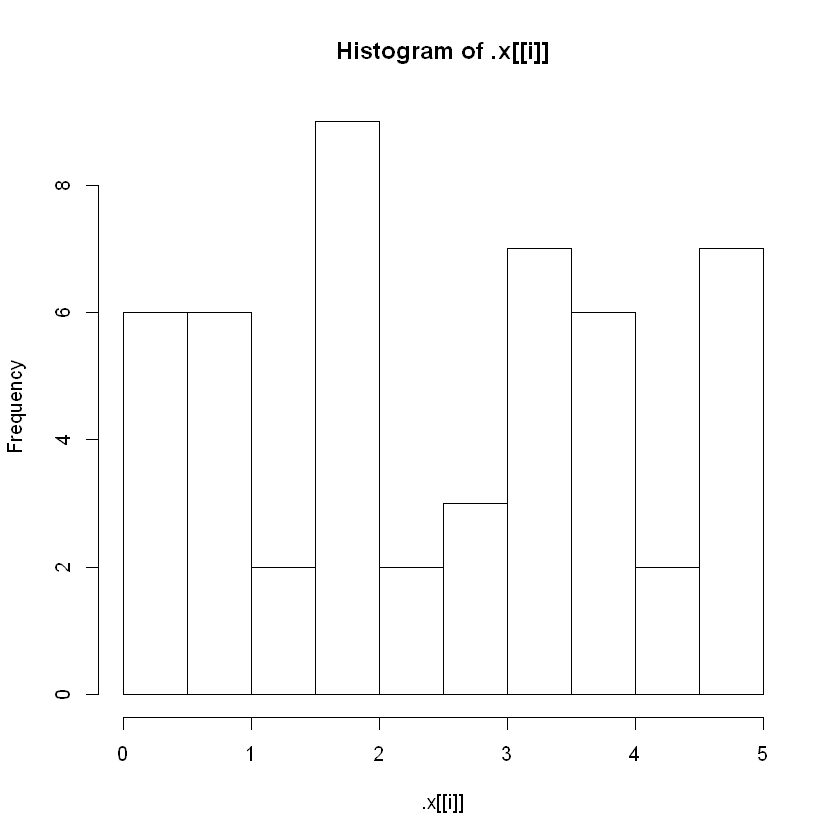

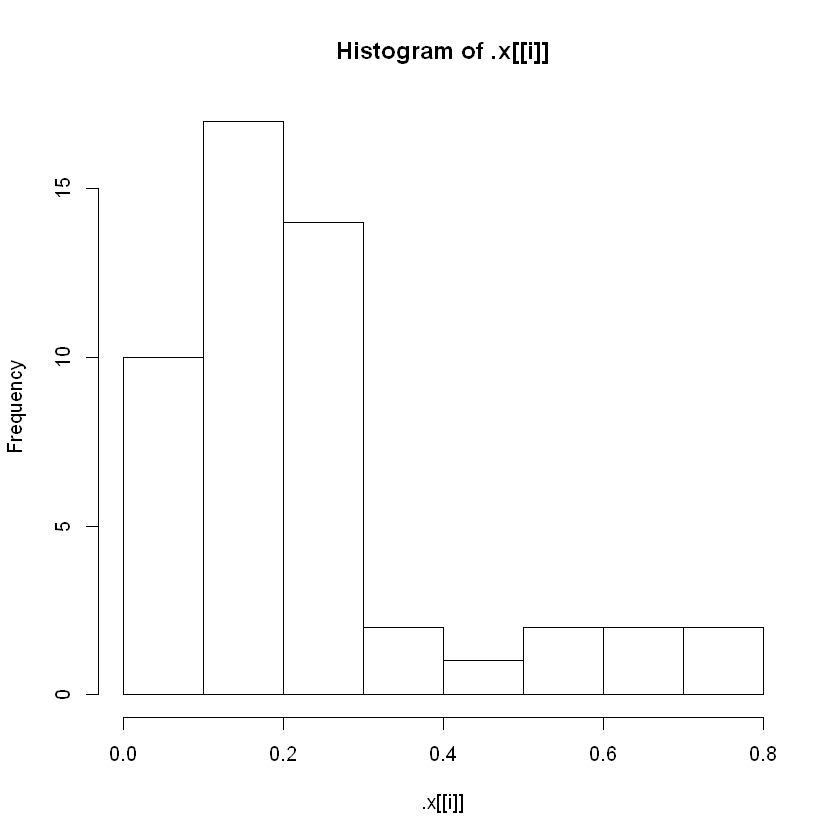

In [9]:
# Define list of functions
f <- list(Normal = "rnorm", Uniform = "runif", Exp = "rexp")

# Define params
params <- list(
  Normal = list(mean = 10),
  Uniform = list(min = 0, max = 5),
  Exp = list(rate = 5)
)

# Assign the simulated samples to sims
sims <- invoke_map(f, params, n = 50)

# Use walk() to make a histogram of each element in sims
walk(sims, hist)

# Replace "Sturges" with reasonable breaks for each sample
breaks_list <- list(
  Normal = seq(6, 16, 0.5),
  Uniform = seq(0, 5, 0.25),
  Exp = seq(0, 1.5, 0.1)
)

## WALK WITH 2 ARGUMENTS

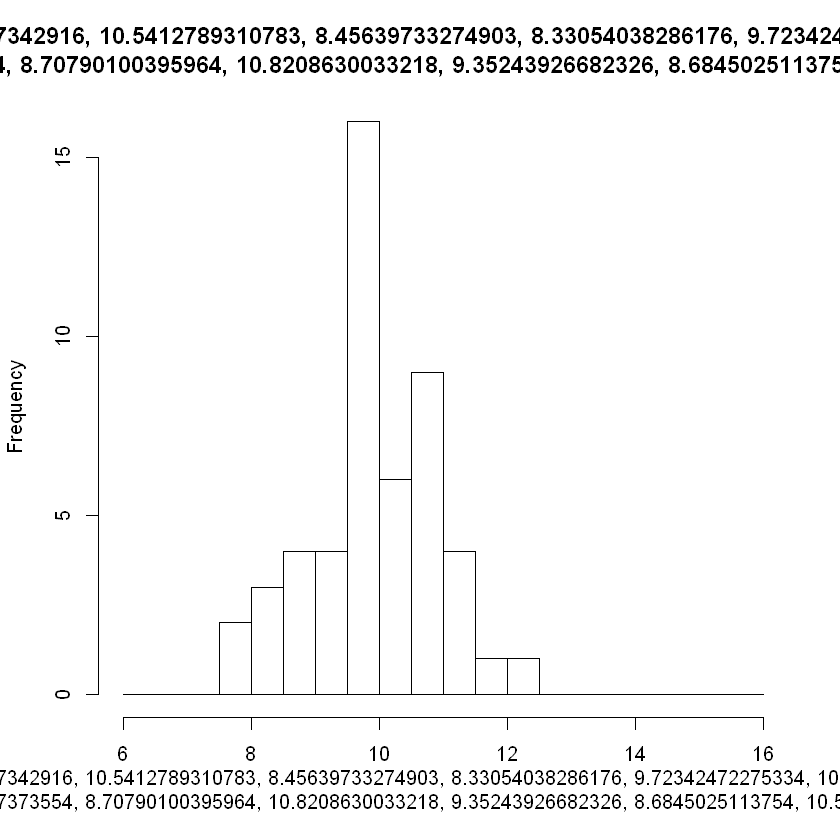

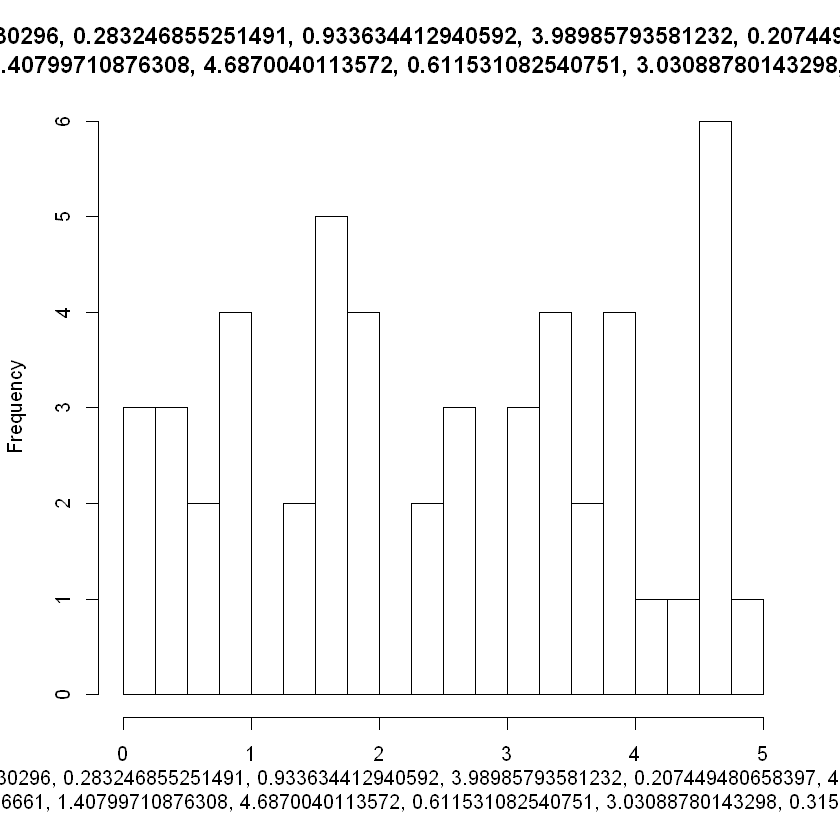

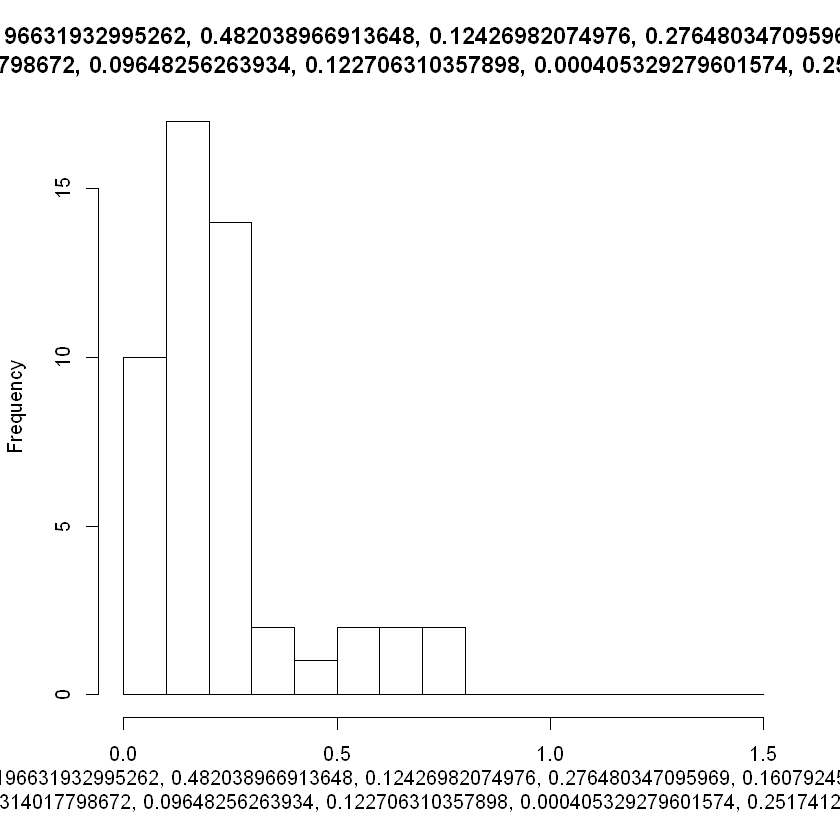

In [10]:
# Use walk2() to make histograms with the right breaks
walk2(sims, breaks_list, hist)

## WALK AND MAP

Generate reasonable breaks based on actual values in samples

[1]  7.710282  7.868770  8.027258  8.185747  8.344235  8.502724  8.661212
 [8]  8.819701  8.978189  9.136677  9.295166  9.453654  9.612143  9.770631
[15]  9.929119 10.087608 10.246096 10.404585 10.563073 10.721562 10.880050
[22] 11.038538 11.197027 11.355515 11.514004 11.672492 11.830981 11.989469
[29] 12.147957 12.306446

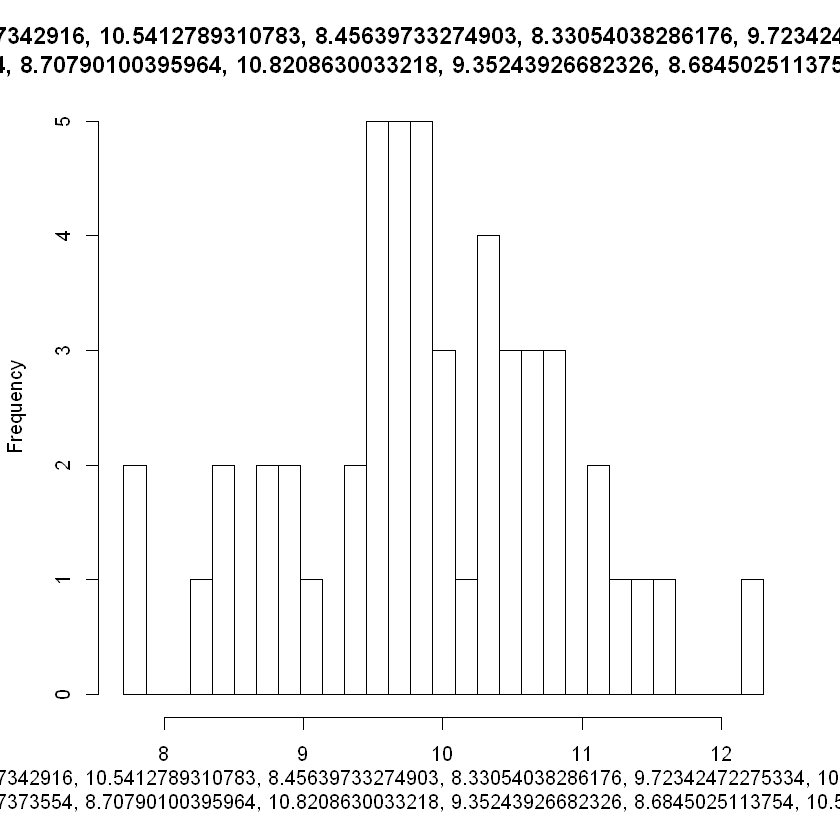

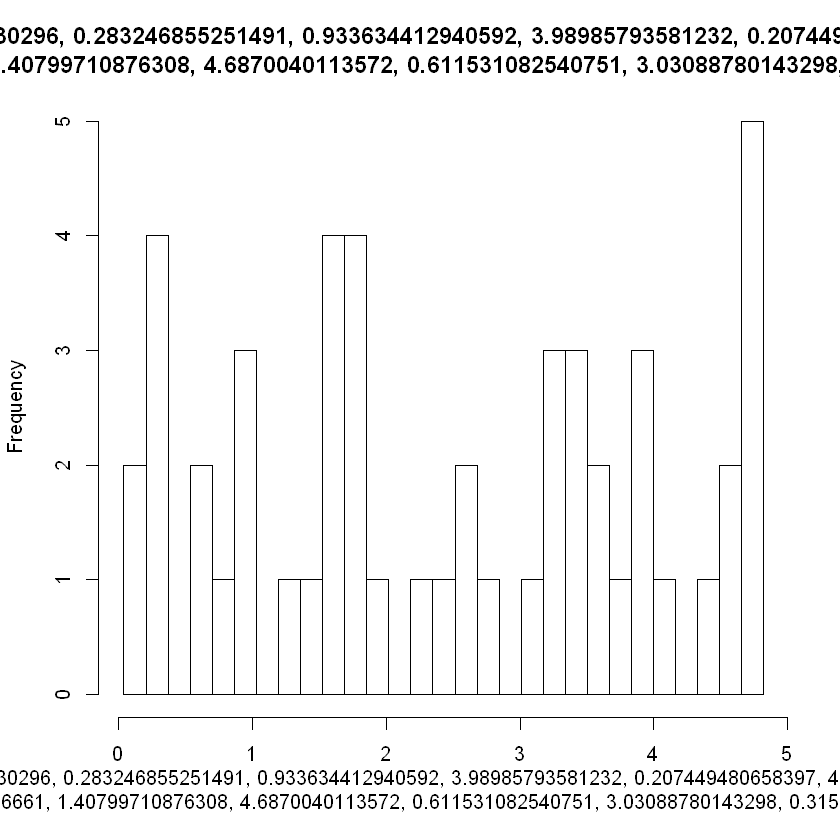

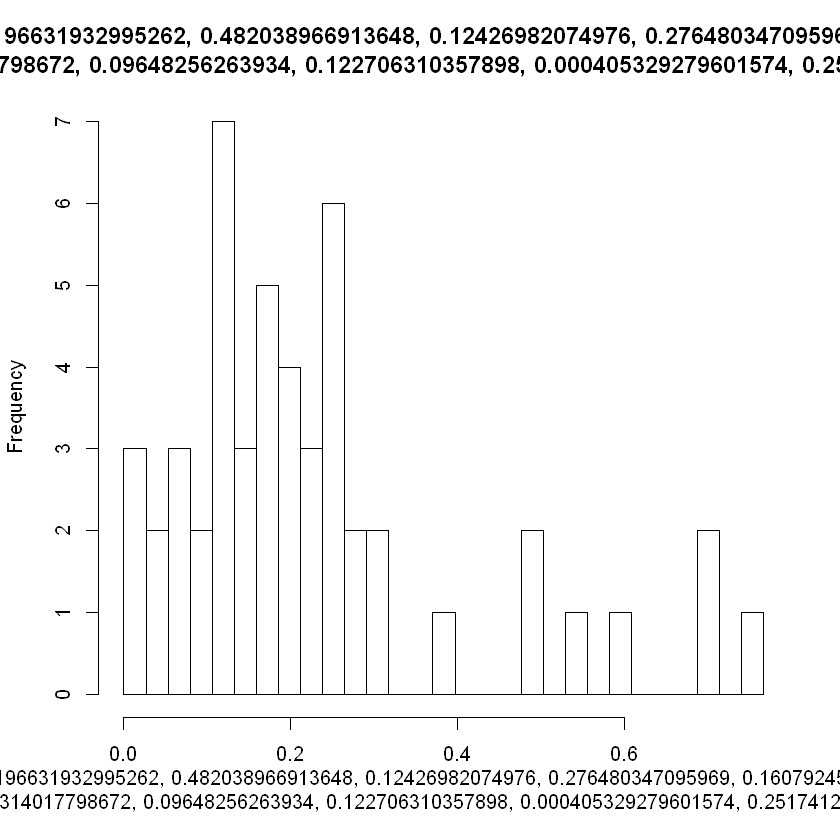

In [11]:
# Turn this snippet into find_breaks()
find_breaks <- function(x) {
  rng <- range(x, na.rm = TRUE)
  seq(rng[1], rng[2], length.out = 30)
}

# Call find_breaks() on sims[[1]]
find_breaks(sims[[1]])

# Use map() to iterate find_breaks() over sims: nice_breaks
nice_breaks <- map(sims, find_breaks)

# Use nice_breaks as the second argument to walk2()
walk2(sims, nice_breaks, hist)

## WALK WITH MANY ARGUMENTS

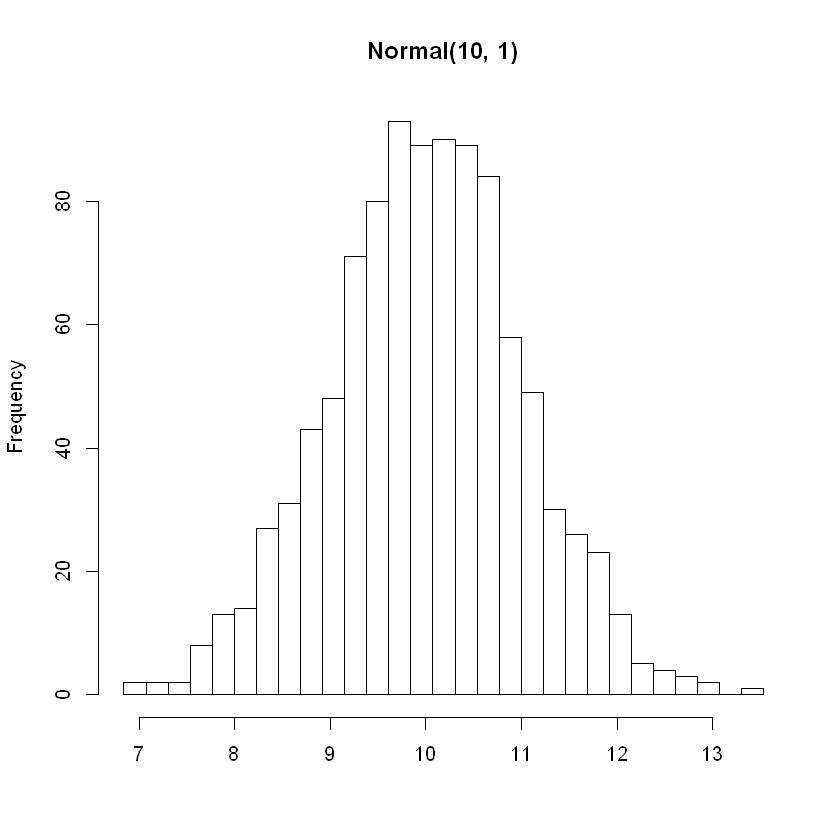

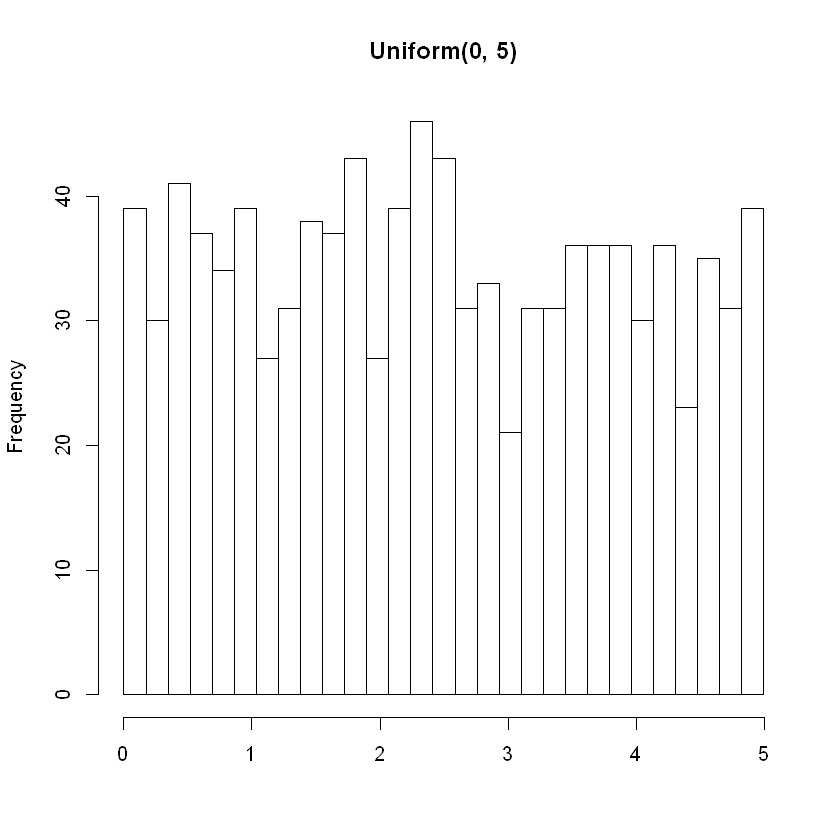

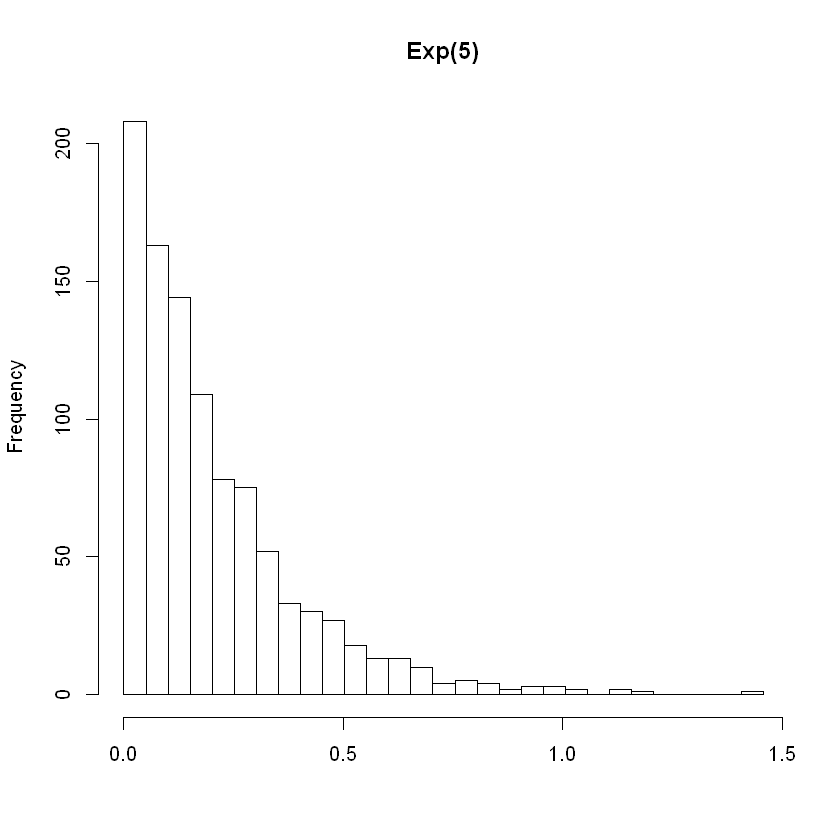

In [12]:
# Increase sample size to 1000
sims <- invoke_map(f, params, n = 1000)

# Compute nice_breaks (don't change this)
nice_breaks <- map(sims, find_breaks)

# Create a vector nice_titles
nice_titles <- list("Normal(10, 1)", "Uniform(0, 5)", "Exp(5)")

# Use pwalk() instead of walk2()
pwalk(list(x = sims, breaks = nice_breaks, main = nice_titles), hist, xlab = "")

## WALK WITH PIPE

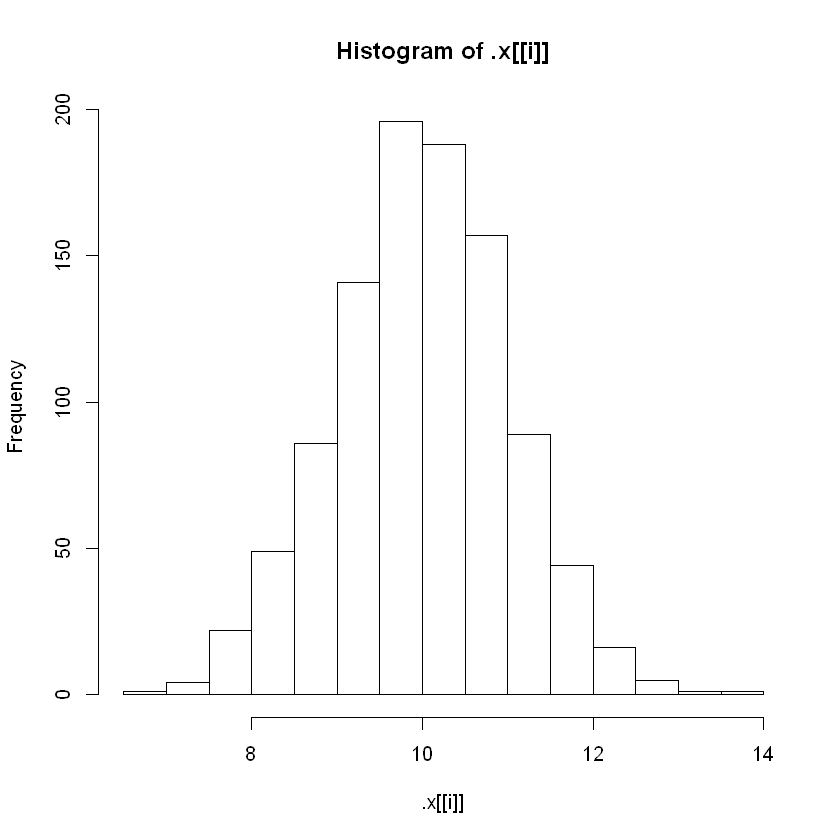

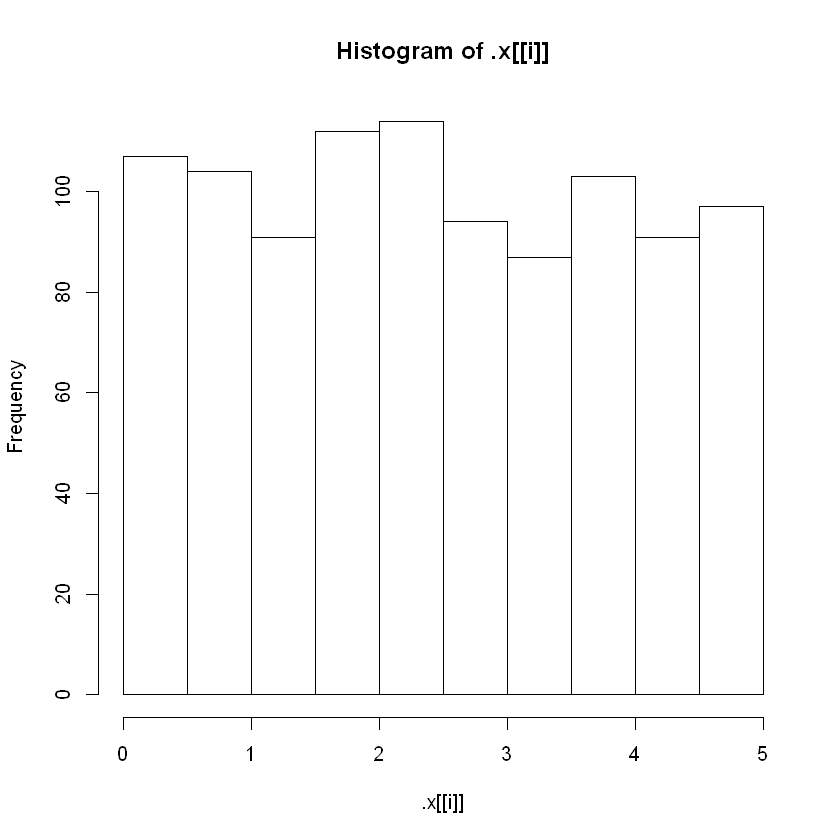

$Normal
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.843   9.348  10.010  10.004  10.673  13.538 

$Uniform
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002949 1.232319 2.392078 2.446869 3.679787 4.992590 

$Exp
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0005266 0.0616437 0.1419303 0.2040964 0.2849255 1.4587806 


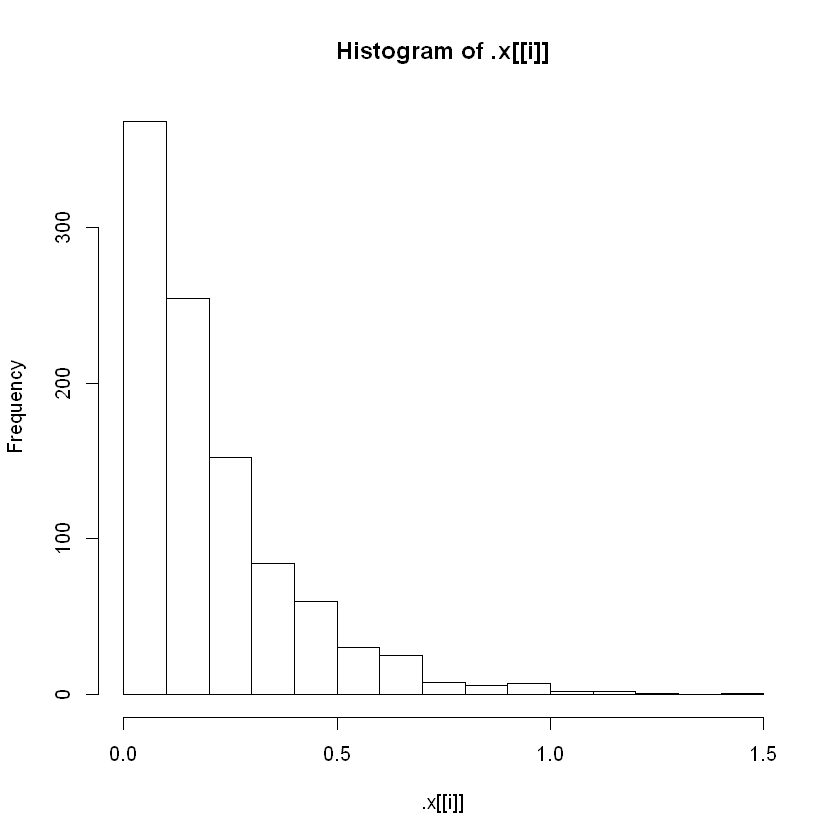

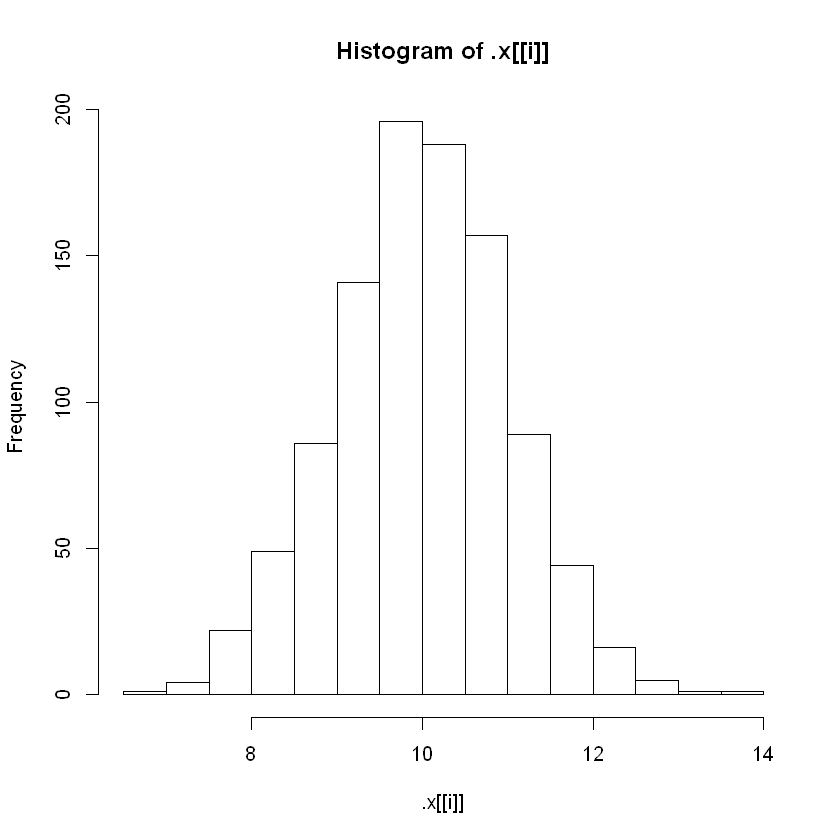

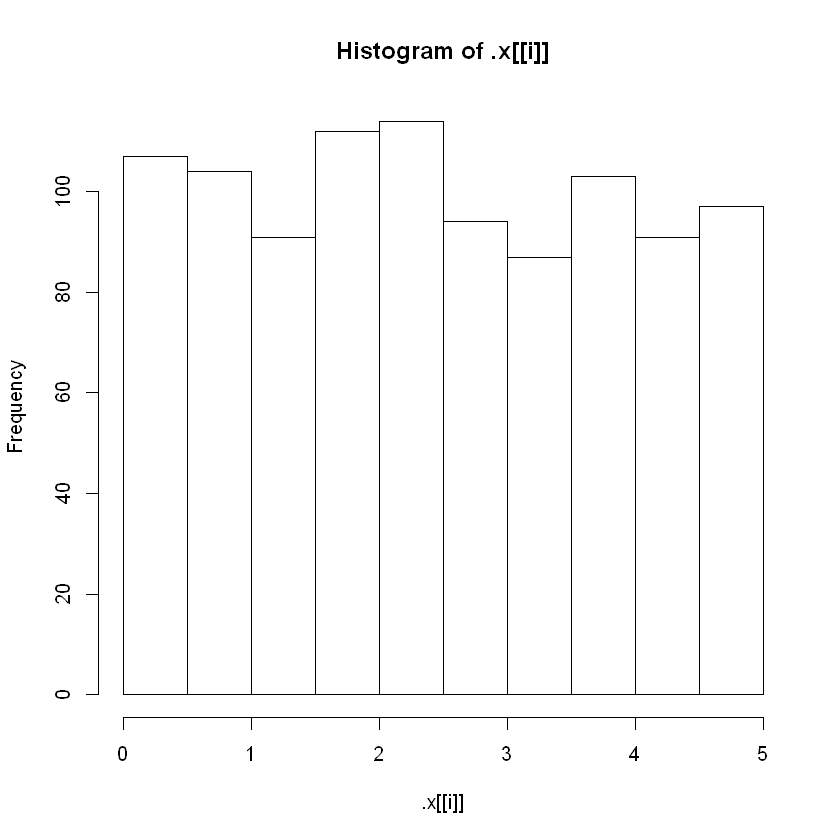

List of 3
 $ Normal : num [1:1000] 9.59 8.07 9.72 8.75 8.62 ...
 $ Uniform: num [1:1000] 4.0613 0.0752 2.5007 3.3546 2.701 ...
 $ Exp    : num [1:1000] 0.00357 0.24574 0.14121 0.17272 0.12899 ...


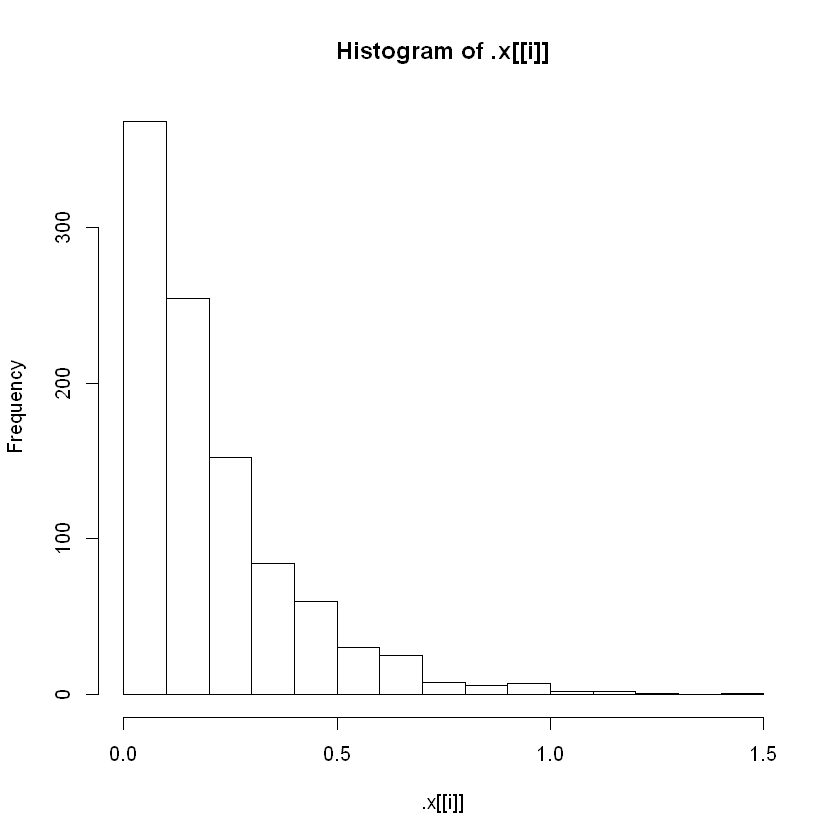

In [13]:
# Pipe this along to map(), using summary() as .f
sims %>%
  walk(hist) %>%
  map(summary)

# Structure of walk is the original sims object
str(sims %>% walk(hist))